In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [2]:
max_abusers = 1

In [3]:
usage_report_names = glob('RhinoWeeklyUsageReport.*.csv')

master_df = None
for fname in usage_report_names:
    print fname
    date_str =  fname.split('.')[1]
    date_pd_obj = pd.to_datetime(date_str,format= '%Y%m%d')
    df = pd.read_csv(fname)
    df['date'] = date_pd_obj
    
    if master_df is None:
        master_df = df
    else:
        master_df = pd.concat([master_df,df], ignore_index=True)

# rt_idx = master_df.columns.index('RUNTUME (s)') 

# if rt_idx>=0:
columns = list(master_df.columns)

columns[1] = 'RUNTIME (s)'
master_df.columns=columns
        


RhinoWeeklyUsageReport.20160510.csv
RhinoWeeklyUsageReport.20160517.csv
RhinoWeeklyUsageReport.20160531.csv
RhinoWeeklyUsageReport.20160607.csv


In [4]:
mean_usage_df = master_df.groupby('USER').mean()

In [5]:
cpu_abusers  = mean_usage_df['CPUTIME (s)'].sort_values( ascending=False)
runtime_abusers = mean_usage_df['RUNTIME (s)'].sort_values(ascending=False)
memory_abusers = mean_usage_df['MEMORY (GB)'].sort_values(ascending=False)
io_abusers = mean_usage_df['IO (GB)'].sort_values( ascending=False)

In [6]:
runtime_abusers.index

Index([u'esolo', u'tungphan', u'cweidema', u'sudas', u'timothy.sheehan',
       u'jgermi', u'uma.mohan', u'jkragel', u'jfm2', u'yezzyat', u'healeym',
       u'andrew.watrous', u'mikhail.katkov', u'jostein', u'salman.qasim',
       u'niclong', u'lyj', u'maint', u'malika.datta', u'mswat', u'anjohri',
       u'ks347', u'peter.horak', u'maolson', u'ramayya', u'iped',
       u'elliot.smith'],
      dtype='object', name=u'USER')

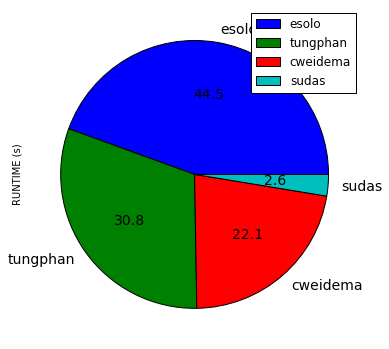

In [7]:
runtime_abusers[:4].plot.pie(autopct='%.1f', fontsize=14, figsize=(6, 6), legend=True)

# rt = runtime_abusers[:max_abusers]

# labels = rt.index
# sizes = rt.values
# # colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
# # explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

# plt.pie(sizes, 
# #         explode=explode, 
#         labels=labels, 
# #         colors=colors,
#         autopct='%1.1f%%', shadow=True, startangle=90)
# # Set aspect ratio to be equal so that pie is drawn as a circle.
# plt.axis('equal')
# plt.legend()

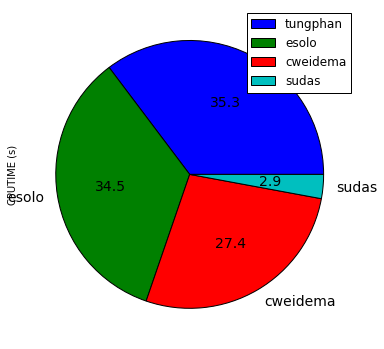

In [8]:
cpu_abusers[:4].plot.pie(autopct='%.1f', fontsize=14, figsize=(6, 6), legend=True)

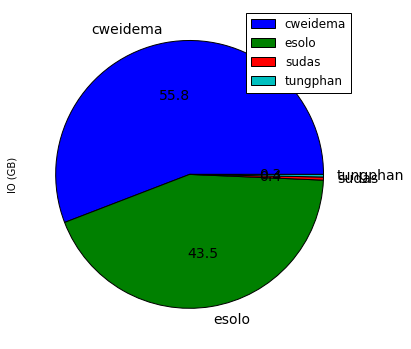

In [9]:
io_abusers[:4].plot.pie(autopct='%.1f', fontsize=14, figsize=(6, 6), legend=True)

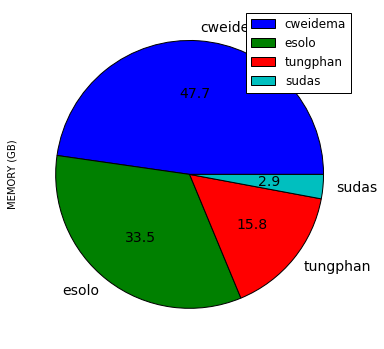

In [10]:
memory_abusers[:4].plot.pie(autopct='%.1f', fontsize=14, figsize=(6, 6), legend=True)